In [1]:
import numpy as np
from scipy.optimize import minimize
import scipy.signal as si
import sympy as sp
import control as ct
from typing import List
from sympy.plotting import plot
import matplotlib.pyplot as plt
from IPython.display import display, Latex, Math, Image
%matplotlib inline

def eq_disp(varstring, expr, unit=""):
    display(Latex(f"${varstring}={sp.latex(expr)} \: {unit}$"))
    
def reduce_feedback(G_fwd, G_bwd):
    """Assumes feedback is deducted from signal, if not
    change sign of feedback"""
    return sp.simplify(G_fwd/(1+G_fwd*G_bwd))

# Problem 1

## 1) Transfer function
Using the voltage divider rule
$$V_x = V_{in}\left(\frac{Z_x}{Z_{tot}}\right)$$

In [5]:
s, R, C, L, V_in = sp.symbols('s, R, C, L, V_in')
V_out = V_in*(R + 1/(C*s))/(R + 1/(C*s) + L*s)
eq_disp('V_{out}', V_out)

<IPython.core.display.Latex object>

Simplifying expression and finding the transfer function $H(s)$

In [8]:
eq_disp('V_{out}', sp.simplify(V_out))
H = sp.simplify(V_out/V_in)
eq_disp('H(s)=\\frac{V_{out}}{V_{in}}', H)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## 2) Bode diagram

Input values for capacitance, resistance and inductance

<IPython.core.display.Latex object>

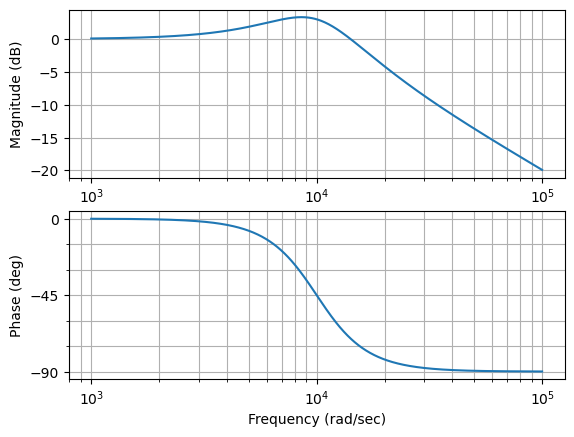

In [14]:
s = ct.tf('s')
R = 1*10**3
L = 0.1
C = 0.1*10**(-6)
H = (R + 1/(C*s))/(R + 1/(C*s) + L*s)
eq_disp('H(s)', H)
mag, phase, omega = ct.bode(H, dB=True)

## 3) Cutoff frequency

<IPython.core.display.Latex object>

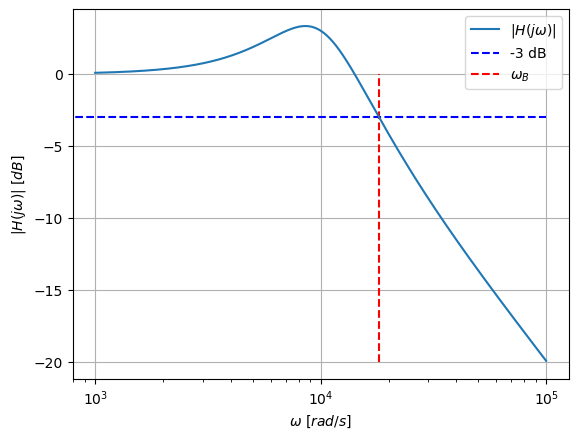

In [28]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

i_cutoff = find_nearest(20*np.log10(mag), -3)

omega_B = omega[i_cutoff]

eq_disp('\\omega_B', omega_B, 'rad/s')

plt.plot(omega,20*np.log10(mag), label='$|H(j\\omega)|$')
plt.hlines(-3, 0, 10**5, linestyle='--', color='b', label='-3 dB')
plt.vlines(omega_B, -20, 0, linestyle='--', color='r', label='$\\omega_B$')
plt.xlabel('$\\omega$ $[rad/s]$')
plt.ylabel('$|H(j\\omega)|$ $[dB]$')
plt.legend()
plt.grid()
plt.xscale('log')

## 4) Is it a high pass or low pass filter?

It is a low pass filter

# Problem 2